In [41]:
import evolml
import evolml.models
import metaheuristic_designer as mhd
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

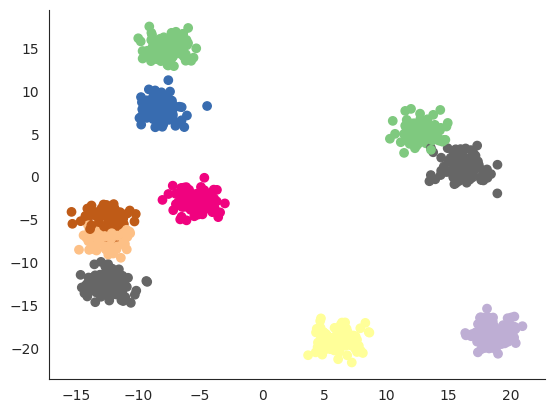

In [42]:
k = 10
X, y = make_blobs(n_samples=1000, n_features=2, centers=k, center_box=(-20,20))
plt.scatter(X[:,0], X[:,1], c=y, cmap="Accent")
sns.despine()
plt.show()

# Greedy K-Medioids

In [43]:
cluster_alg = evolml.models.GreedyKMedioids(k=k, pcross=0.9, pmut=0.1, pop_size=100, stop_cond="time_limit", time_limit=60, verbose=True)
cluster_alg.fit(X)

Initializing optimization of some function using HillClimb
----------------------------------------------------------

Optimizing some function using HillClimb:
	Real time Spent: 0.01 s
	CPU time Spent:  0.01 s
	Generation: 0
	Best fitness: 0.45849285257748085
	Evaluations of fitness: 1


Optimizing some function using HillClimb:
	Real time Spent: 1.0 s
	CPU time Spent:  1.0 s
	Generation: 209
	Best fitness: 0.7296702524696771
	Evaluations of fitness: 210


Optimizing some function using HillClimb:
	Real time Spent: 2.01 s
	CPU time Spent:  2.01 s
	Generation: 426
	Best fitness: 0.7299417559210258
	Evaluations of fitness: 427


Optimizing some function using HillClimb:
	Real time Spent: 3.01 s
	CPU time Spent:  3.01 s
	Generation: 640
	Best fitness: 0.7299417559210258
	Evaluations of fitness: 641


Optimizing some function using HillClimb:
	Real time Spent: 4.01 s
	CPU time Spent:  4.01 s
	Generation: 848
	Best fitness: 0.7299417559210258
	Evaluations of fitness: 849


Optimizing some 

GreedyKMedioids(k=10)

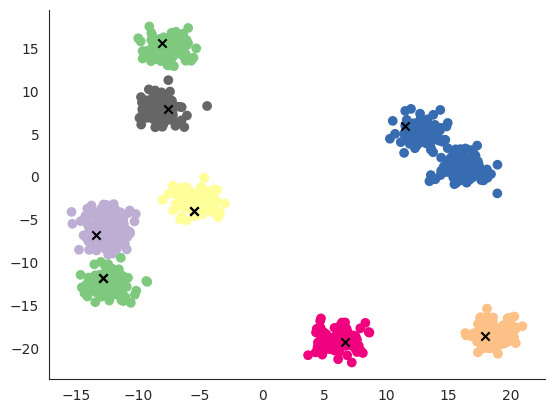

In [44]:
labels = cluster_alg.predict(X) 
plt.scatter(X[:,0], X[:,1], c=labels, cmap="Accent")
plt.scatter(cluster_alg.medioids[:, 0], cluster_alg.medioids[:, 1], marker="x", color="black")
sns.despine()
plt.show()

# Genetic K-Medioids

In [45]:
cluster_alg = evolml.models.GeneticKMedioids(k=k, pcross=0.9, pmut=0.1, pop_size=100, stop_cond="time_limit", time_limit=60, verbose=True)
cluster_alg.fit(X)

Initializing optimization of some function using GA
---------------------------------------------------

Optimizing some function using GA:
	Real time Spent: 0.55 s
	CPU time Spent:  0.55 s
	Generation: 0
	Best fitness: 0.6212006341967197
	Evaluations of fitness: 100

	diversity: 2.74e+02

Optimizing some function using GA:
	Real time Spent: 1.1 s
	CPU time Spent:  1.1 s
	Generation: 1
	Best fitness: 0.643584394436513
	Evaluations of fitness: 200

	diversity: 2.75e+02

Optimizing some function using GA:
	Real time Spent: 2.2 s
	CPU time Spent:  2.2 s
	Generation: 3
	Best fitness: 0.6762333187005294
	Evaluations of fitness: 399

	diversity: 2.7e+02

Optimizing some function using GA:
	Real time Spent: 3.3 s
	CPU time Spent:  3.3 s
	Generation: 5
	Best fitness: 0.7065178559511199
	Evaluations of fitness: 598

	diversity: 2.66e+02

Optimizing some function using GA:
	Real time Spent: 4.39 s
	CPU time Spent:  4.39 s
	Generation: 7
	Best fitness: 0.7065178559511199
	Evaluations of fitness: 

GeneticKMedioids(k=10)

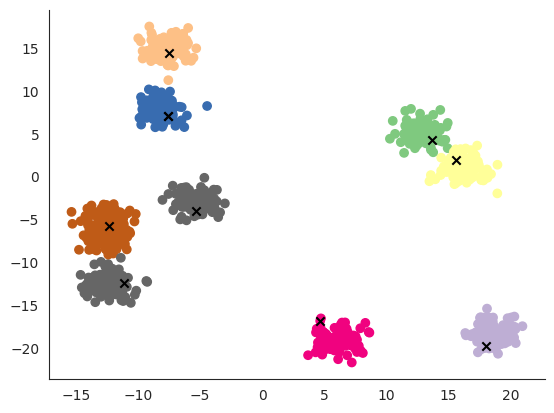

In [46]:
labels = cluster_alg.predict(X) 
plt.scatter(X[:,0], X[:,1], c=labels, cmap="Accent")
plt.scatter(cluster_alg.medioids[:, 0], cluster_alg.medioids[:, 1], marker="x", color="black")
sns.despine()
plt.show()

### comparing real labels with k-medioids labels

In [47]:
pairs = []
pairs_idx = []
centroids = np.asarray([X[y==i].mean(axis=0) for i in range(k)])
medioids = cluster_alg.medioids
medioids_aux = medioids.copy()
for idx, val in enumerate(centroids):
    nearest = np.argmin(((val - medioids_aux)**2).sum(axis=1))
    chosen_m = medioids_aux[nearest]
    medioids_aux = np.delete(medioids_aux, nearest, axis=0)
    pairs += [(val, chosen_m)]
pairs
label_map = dict([(np.where(med[0] == medioids[:,0])[0][0], idx) for idx, (cent, med) in enumerate(pairs)])
true_labels = np.asarray([label_map[i] for i in labels])
print(y)
print(true_labels)

accuracy_score(y, true_labels)

[7 1 8 2 5 2 0 3 7 8 7 2 8 5 2 7 4 2 6 5 6 3 3 6 9 0 7 1 1 8 9 4 0 0 5 0 4
 8 7 8 0 1 3 6 4 3 9 9 2 0 7 0 0 3 7 6 0 9 2 9 0 2 9 0 3 0 8 1 5 7 5 8 0 8
 5 1 6 3 4 3 3 4 5 3 4 7 9 9 6 6 7 9 5 3 5 5 9 3 9 8 9 7 5 9 3 5 4 7 4 9 0
 8 9 4 8 3 8 1 7 1 7 4 7 8 8 6 7 5 1 4 2 8 0 4 5 8 6 7 8 8 9 1 9 0 1 5 8 4
 2 4 7 2 7 7 2 6 4 6 3 3 9 6 7 5 6 3 6 9 6 8 3 4 4 6 1 6 6 6 4 6 3 5 3 9 5
 7 3 9 1 6 2 2 2 3 6 0 9 2 6 4 4 2 1 4 2 1 8 2 6 2 7 2 5 1 2 3 3 4 9 3 1 5
 2 3 4 1 9 2 9 3 9 0 8 4 3 3 4 4 8 7 2 4 4 8 1 2 0 7 0 3 7 0 7 8 2 8 1 3 7
 3 1 1 3 2 9 8 5 2 0 2 9 5 5 8 3 2 8 2 8 6 0 2 7 1 8 3 1 4 7 4 2 3 7 3 9 9
 9 1 7 0 7 6 1 4 3 0 8 9 0 4 5 6 4 6 7 9 8 0 1 4 6 4 0 4 3 3 7 0 6 5 9 5 1
 2 4 9 5 2 9 5 1 7 7 1 8 0 1 2 0 3 9 2 2 5 5 5 1 9 3 8 9 5 8 4 9 8 4 9 7 7
 8 2 6 1 8 5 9 3 1 1 4 4 7 0 1 0 7 8 6 4 8 9 1 2 0 6 5 7 8 0 4 4 4 3 2 2 7
 0 2 1 5 1 5 6 6 1 4 2 2 6 2 9 2 9 9 5 6 4 8 1 4 8 0 6 0 1 6 1 3 4 0 0 0 5
 8 9 7 1 4 0 1 5 5 0 4 8 4 4 5 5 0 8 0 3 8 1 9 6 5 2 8 4 3 8 7 9 0 8 0 9 9
 6 9 5 8 6 3 8 9 3 9 1 8 

0.696